## Food Nutrition

Import library

In [1]:
import tensorflow as tf
print(tf.__version__)

import keras
print (keras.__version__)

import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

2.10.1
2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import random
import os
import matplotlib.pyplot as plt
import tensorflow as tf
#import keras
import numpy as np
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Preprocessing

In [3]:
train_dir = "Image Eye/Train"
test_dir = "Image Eye/Test"
images = []

# for food_folder in sorted(os.listdir(train_dir)):
#     food_items = os.listdir(train_dir + '/' + food_folder)
#     food_selected = np.random.choice(food_items)
#     images.append(os.path.join(train_dir,food_folder,food_selected))

# fig=plt.figure(1, figsize=(25, 25))

# for subplot,image_ in enumerate(images):
#     category=image_.split('\\')[-2]
#     imgs = plt.imread(image_)
#     a,b,c=imgs.shape
#     fig=plt.subplot(5, 4, subplot+1)
#     fig.set_title(category, pad = 10,size=18)
#     plt.imshow(imgs)

# plt.tight_layout()

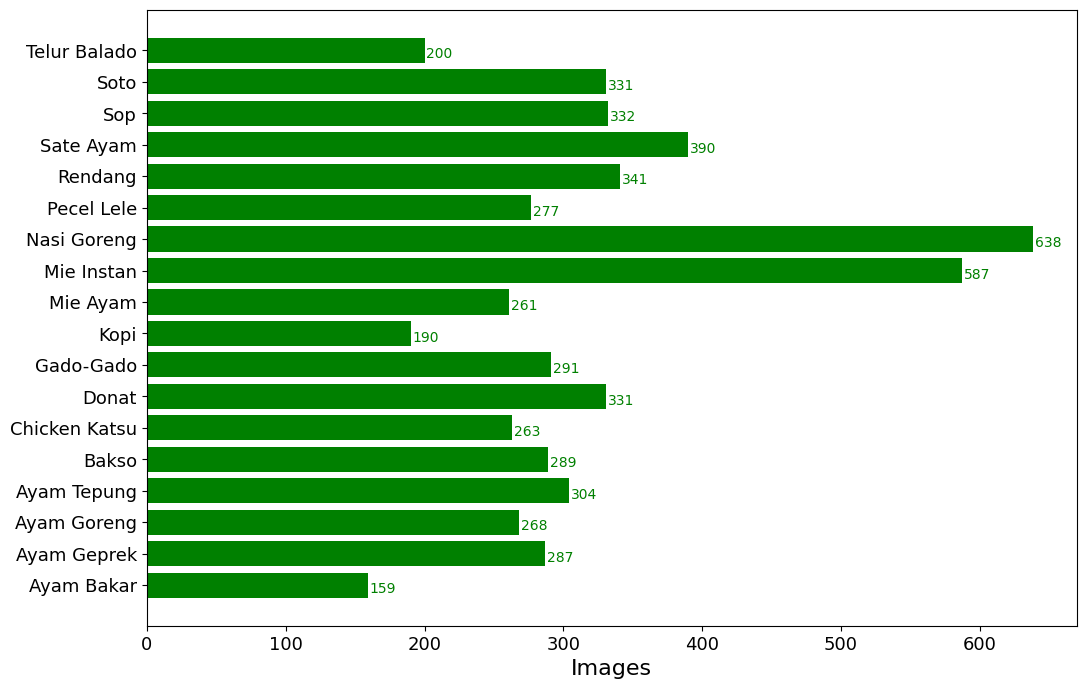

In [6]:
data=dict()

for i in os.listdir(train_dir):
    sub_dir=os.path.join(train_dir,i)
    count=len(os.listdir(sub_dir))
    data[i]=count
    
  
keys = data.keys()
values = data.values()

colors=["red" if x<= 150 else "green" for x in values]

fig, ax = plt.subplots(figsize=(12,8))
y_pos=np.arange(len(values))
plt.barh(y_pos,values,align='center',color=colors)
for i, v in enumerate(values):
    ax.text(v+1.4, i-0.25, str(v), color=colors[i])
ax.set_yticks(y_pos)
ax.set_yticklabels(keys)
ax.set_xlabel('Images',fontsize=16)
plt.xticks(color='black',fontsize=13)
plt.yticks(fontsize=13)
plt.show()

Data Augmentation

In [7]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./ 255,
                                                                 rotation_range=40,
                                                                 width_shift_range=0.2,
                                                                 height_shift_range=0.2,
                                                                 shear_range=0.2,
                                                                 zoom_range=0.4,
                                                                 horizontal_flip=True,
                                                                 fill_mode='nearest')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(244, 244),
                                                    batch_size=32,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(244, 244),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 4832 images belonging to 18 classes.
Found 1214 images belonging to 18 classes.


In [8]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Transfer Learning

In [9]:
# Loading the Pre-trained Xception Model
from tensorflow.keras.applications import Xception

# Loading the Pre-trained Xception Model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(244, 244, 3))

# Checking the amount of layers
total_layers = len(base_model.layers)

# Choose the last half of the layers
fn_layers = total_layers - int(0.5 * total_layers)

# Freezing the Base Layer but retrain the last half of the layers
# for layer in base_model.layers[:fn_layers]:
#     layer.trainable = False
for layer in base_model.layers[:fn_layers]:
    layer.trainable = False    

#base_model.summary()                 

In [10]:
#Show the trainable layers
trainable_layers = [layer.name for layer in base_model.layers if layer.trainable]
print("Trainable Layers:")
for layer in trainable_layers:
    print(layer)

Trainable Layers:
block8_sepconv1_act
block8_sepconv1
block8_sepconv1_bn
block8_sepconv2_act
block8_sepconv2
block8_sepconv2_bn
block8_sepconv3_act
block8_sepconv3
block8_sepconv3_bn
add_6
block9_sepconv1_act
block9_sepconv1
block9_sepconv1_bn
block9_sepconv2_act
block9_sepconv2
block9_sepconv2_bn
block9_sepconv3_act
block9_sepconv3
block9_sepconv3_bn
add_7
block10_sepconv1_act
block10_sepconv1
block10_sepconv1_bn
block10_sepconv2_act
block10_sepconv2
block10_sepconv2_bn
block10_sepconv3_act
block10_sepconv3
block10_sepconv3_bn
add_8
block11_sepconv1_act
block11_sepconv1
block11_sepconv1_bn
block11_sepconv2_act
block11_sepconv2
block11_sepconv2_bn
block11_sepconv3_act
block11_sepconv3
block11_sepconv3_bn
add_9
block12_sepconv1_act
block12_sepconv1
block12_sepconv1_bn
block12_sepconv2_act
block12_sepconv2
block12_sepconv2_bn
block12_sepconv3_act
block12_sepconv3
block12_sepconv3_bn
add_10
block13_sepconv1_act
block13_sepconv1
block13_sepconv1_bn
block13_sepconv2_act
block13_sepconv2
blo

Learning Rate Schedhuler

In [11]:
# Customize the Learning Rate
inisiate_lr = 0.0001
epochs = 20

def lr_scedhuler(epoch):
    return inisiate_lr * 0.5 ** epoch 

optimizers=tf.keras.optimizers.Adam(learning_rate=inisiate_lr)

Adding new layers to the base_model

In [12]:
model = tf.keras.models.Sequential([
  base_model,
  tf.keras.layers.GlobalMaxPooling2D(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  #tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(18, activation='softmax')  # Menggunakan softmax karena ini adalah klasifikasi multikelas
])

Compile The Model

In [13]:
model.compile(optimizer= optimizers,
              loss='categorical_crossentropy',  # Menggunakan categorical_crossentropy untuk klasifikasi multikelas
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 18)                4626      
                                                        

Create Callbacks

In [14]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.90 and logs.get('accuracy') > 0.95):
      # Stop if threshold is met
      print("\nYOU DID IT GIRLLLL, BOTH ARE HIGHER THAN 0.94 DAMN SLAYYY!! :P")
      self.model.stop_training = True

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

# Instantiate class
callbacks = myCallback()

In [15]:
#Reducing the Learning Rate if there's no progress in the loss 
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

# Model Training

In [16]:
# AKURASI AWALNYA 0.2 
epochs= 20

history=model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=epochs, verbose=1, callbacks=[callbacks, reduce_lr])  # Sesuaikan jumlah langkah per epoch sesuai kebutuhan

Epoch 1/20
151/151 [==============================] - 69s 429ms/step - loss: 2.7229 - accuracy: 0.1885 - val_loss: 1.7785 - val_accuracy: 0.6153 - lr: 1.0000e-04
Epoch 2/20
151/151 [==============================] - 64s 425ms/step - loss: 1.3279 - accuracy: 0.6047 - val_loss: 0.7031 - val_accuracy: 0.7891 - lr: 1.0000e-04
Epoch 3/20
151/151 [==============================] - 65s 427ms/step - loss: 0.7685 - accuracy: 0.7784 - val_loss: 0.5246 - val_accuracy: 0.8410 - lr: 1.0000e-04
Epoch 4/20
151/151 [==============================] - 65s 427ms/step - loss: 0.5772 - accuracy: 0.8301 - val_loss: 0.4997 - val_accuracy: 0.8526 - lr: 1.0000e-04
Epoch 5/20
151/151 [==============================] - 66s 434ms/step - loss: 0.4678 - accuracy: 0.8636 - val_loss: 0.4539 - val_accuracy: 0.8764 - lr: 1.0000e-04
Epoch 6/20
151/151 [==============================] - 64s 424ms/step - loss: 0.4023 - accuracy: 0.8872 - val_loss: 0.3923 - val_accuracy: 0.8946 - lr: 1.0000e-04
Epoch 7/20
151/151 [========

# Model Evaluate

Checking the F1 score

In [17]:
from sklearn.metrics import f1_score

# Melakukan prediksi pada data uji
y_pred = model.predict(test_generator)
y_true = test_generator.classes

# Menggunakan argmax untuk mendapatkan kelas prediksi
y_pred_classes = np.argmax(y_pred, axis=1)

# Menghitung F1 score
f1score = f1_score(y_true, y_pred_classes, average='weighted')

print("F1 Score:", f1score)

38/38 [==============================] - 8s 207ms/step
F1 Score: 0.8990826463127216


In [18]:
#model.save('my_model2')

Plot of The Model

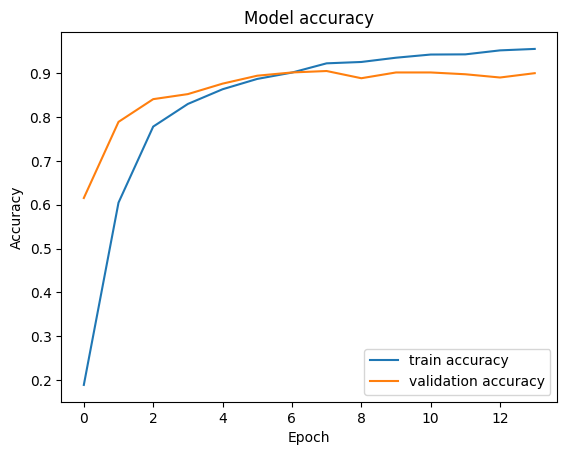

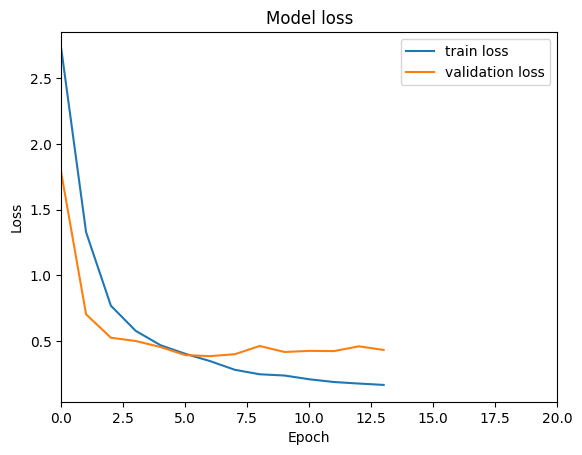

In [19]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

def plot_loss(history):
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.xlim(0, epochs )
    #plt.ylim(0,100)
    plt.legend(loc='best')
    plt.show()

plot_accuracy(history)
plot_loss(history)

Confusion Matrix

In [20]:
predictions = np.argmax(model.predict(test_generator), axis=1)

cm = confusion_matrix(test_generator.labels, predictions)
clr = classification_report(test_generator.labels, predictions, target_names=test_generator.class_indices, zero_division=0)

38/38 [==============================] - 8s 210ms/step


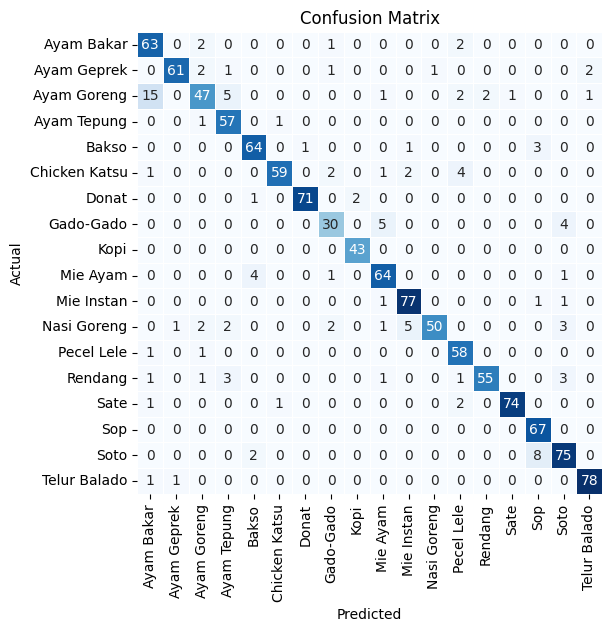

In [21]:
plt.figure(figsize=(6,6))
#sns.heatmap(cm, annot=True, fmt='d', vmin=0, plt.cm.colors.ListedColormap(['#FFC0CB']), cbar=False, linewidths=.5)
sns.heatmap(cm, annot=True, fmt='d', vmin=0, cmap='Blues', cbar=False, linewidths=.5)
plt.xticks(ticks=np.arange(18) + 0.5, labels=test_generator.class_indices, rotation=90)
plt.yticks(ticks=np.arange(18) + 0.5, labels=test_generator.class_indices, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
clr = classification_report(test_generator.labels, predictions, target_names=test_generator.class_indices, zero_division=0)
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
                precision    recall  f1-score   support

   Ayam Bakar       0.76      0.93      0.83        68
  Ayam Geprek       0.97      0.90      0.93        68
  Ayam Goreng       0.84      0.64      0.72        74
  Ayam Tepung       0.84      0.97      0.90        59
        Bakso       0.90      0.93      0.91        69
Chicken Katsu       0.97      0.86      0.91        69
        Donat       0.99      0.96      0.97        74
    Gado-Gado       0.81      0.77      0.79        39
         Kopi       0.96      1.00      0.98        43
     Mie Ayam       0.86      0.91      0.89        70
   Mie Instan       0.91      0.96      0.93        80
  Nasi Goreng       0.98      0.76      0.85        66
   Pecel Lele       0.84      0.97      0.90        60
      Rendang       0.96      0.85      0.90        65
         Sate       0.99      0.95      0.97        78
          Sop       0.85      1.00      0.92        67
         Soto    

# Model Predict

1/1 [==============================] - 1s 595ms/step


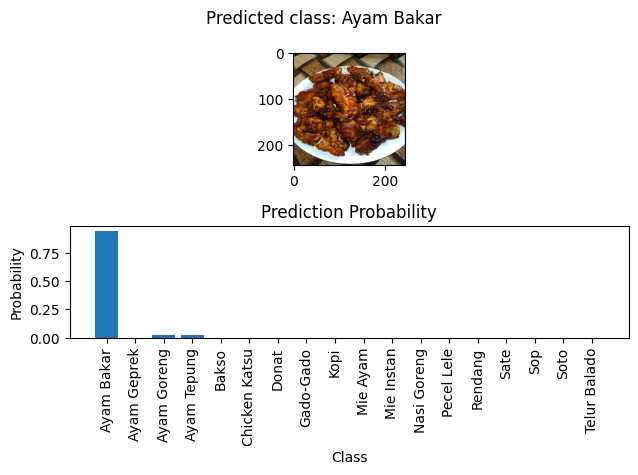

  Nama_makanan  Kalori   Lemak Karbohidrat Protein      Kategori
0   Ayam Bakar     201  11.46g          0g  23.01g  Daging, Ayam
1/1 [==============================] - 0s 24ms/step


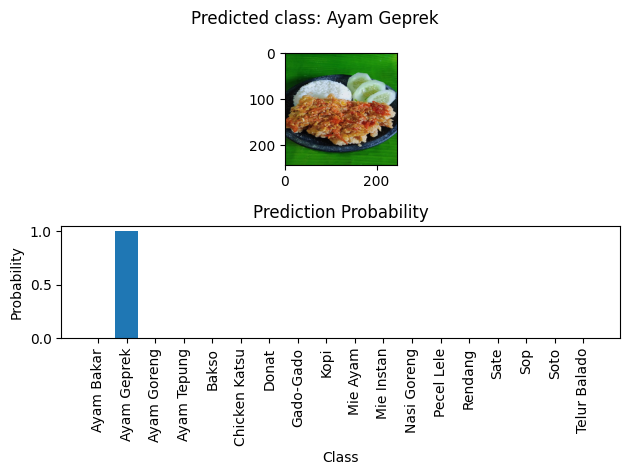

  Nama_makanan  Kalori   Lemak Karbohidrat Protein      Kategori
1  Ayam Geprek     789  53.97g      22.81g   5.82g  Daging, Ayam
1/1 [==============================] - 0s 23ms/step


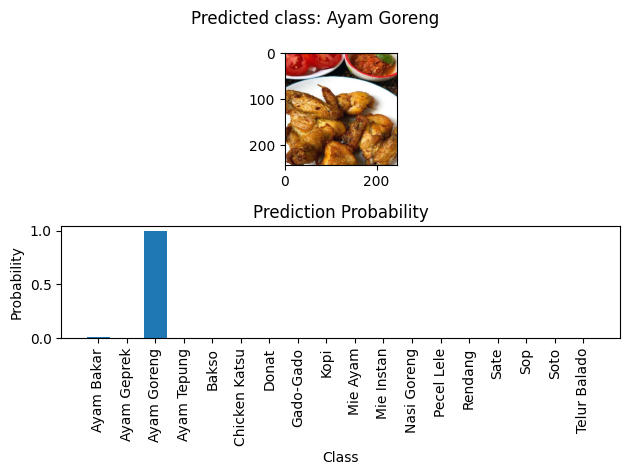

  Nama_makanan  Kalori  Lemak Karbohidrat Protein      Kategori
2  Ayam Goreng     230  12.4g          6g   23.5g  Daging, Ayam
1/1 [==============================] - 0s 22ms/step


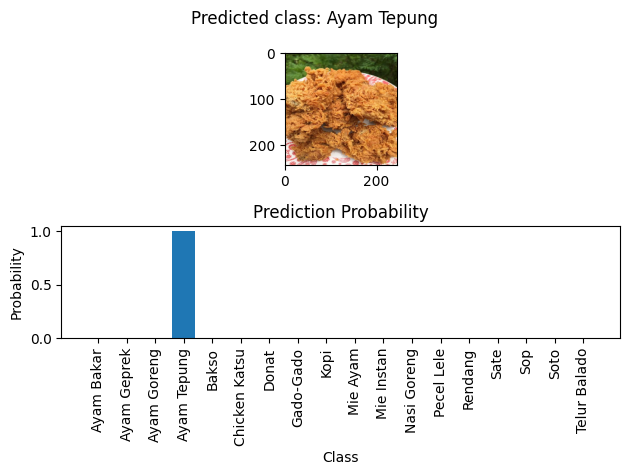

  Nama_makanan  Kalori   Lemak Karbohidrat Protein      Kategori
3  Ayam Tepung     291  18.82g      16.32g  15.59g  Daging, Ayam
1/1 [==============================] - 0s 19ms/step


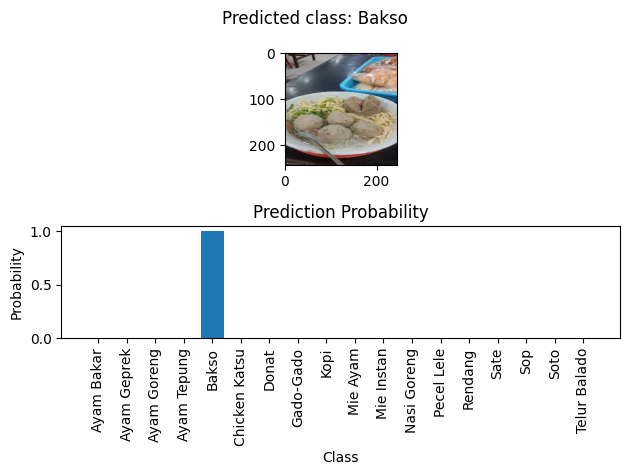

  Nama_makanan  Kalori  Lemak Karbohidrat Protein  Kategori
4        Bakso     225  7.87g       9.71g  27.15g  Serealia
1/1 [==============================] - 0s 19ms/step


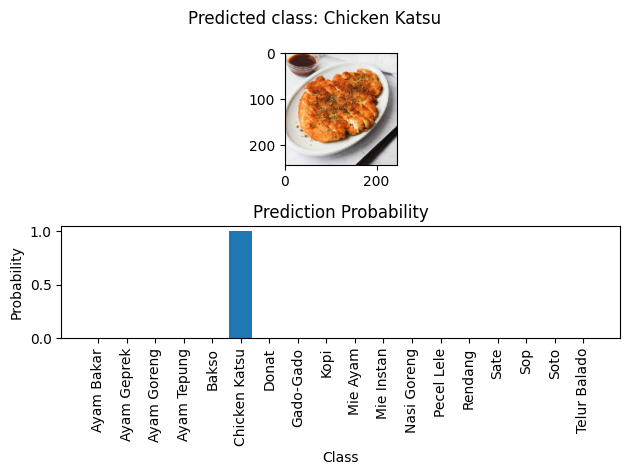

    Nama_makanan  Kalori   Lemak Karbohidrat Protein      Kategori
5  Chicken Katsu     297  18.82g      16.32g  15.59g  Daging, Ayam
1/1 [==============================] - 0s 20ms/step


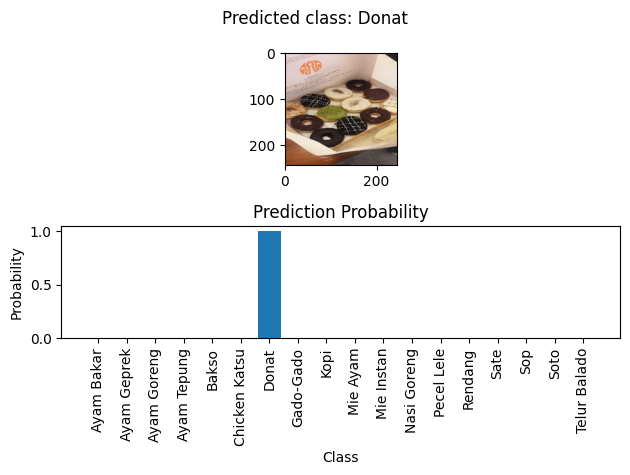

  Nama_makanan  Kalori  Lemak Karbohidrat Protein  Kategori
6        Donat     426  22.9g       50.8g    5.2g  Serealia
1/1 [==============================] - 0s 19ms/step


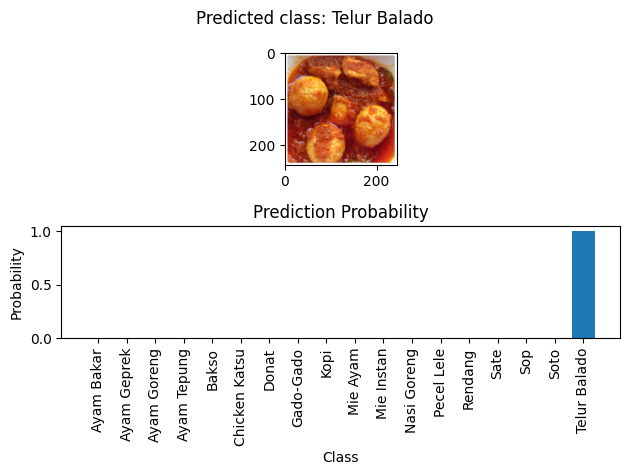

    Nama_makanan  Kalori  Lemak Karbohidrat Protein Kategori
17  Telur Balado     142  11.5g       2.44g    7.1g     Ayam
1/1 [==============================] - 0s 19ms/step


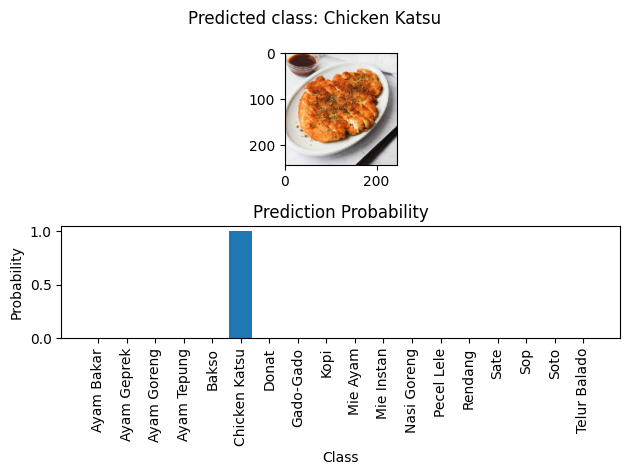

    Nama_makanan  Kalori   Lemak Karbohidrat Protein      Kategori
5  Chicken Katsu     297  18.82g      16.32g  15.59g  Daging, Ayam
1/1 [==============================] - 0s 19ms/step


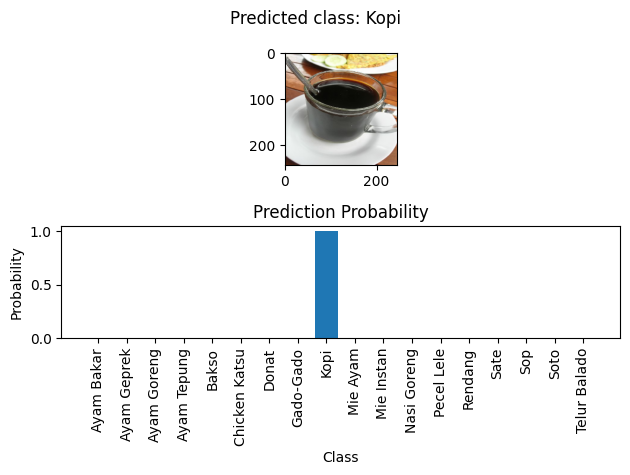

  Nama_makanan  Kalori  Lemak Karbohidrat Protein Kategori
8         Kopi      29  0.01g       7.12g   0.19g  Minuman
1/1 [==============================] - 0s 21ms/step


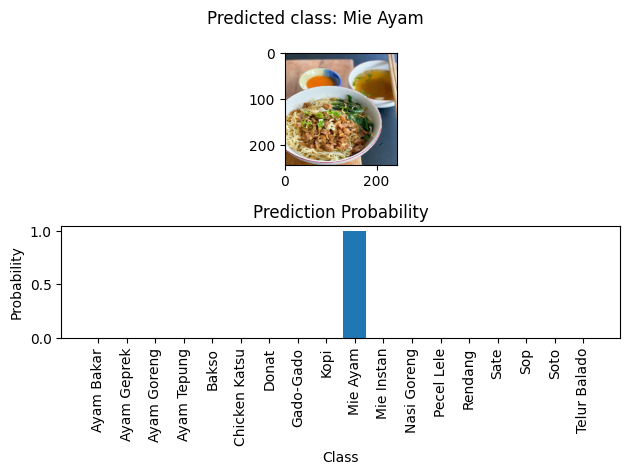

  Nama_makanan  Kalori   Lemak Karbohidrat Protein        Kategori
9     Mie Ayam     421  18.74g      46.21g   16.7g  Serealia, Ayam
1/1 [==============================] - 0s 26ms/step


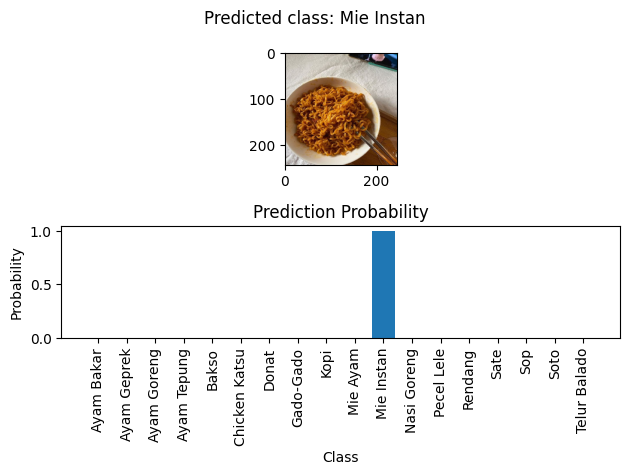

   Nama_makanan  Kalori Lemak Karbohidrat Protein  Kategori
10   Mie Instan     350   12g         52g      8g  Serealia
1/1 [==============================] - 0s 24ms/step


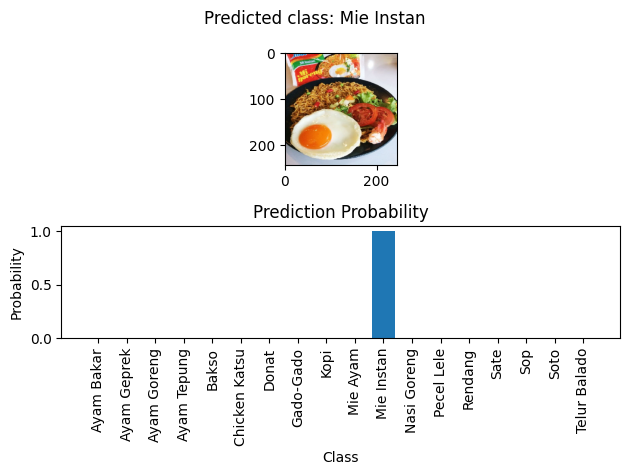

   Nama_makanan  Kalori Lemak Karbohidrat Protein  Kategori
10   Mie Instan     350   12g         52g      8g  Serealia
1/1 [==============================] - 0s 29ms/step


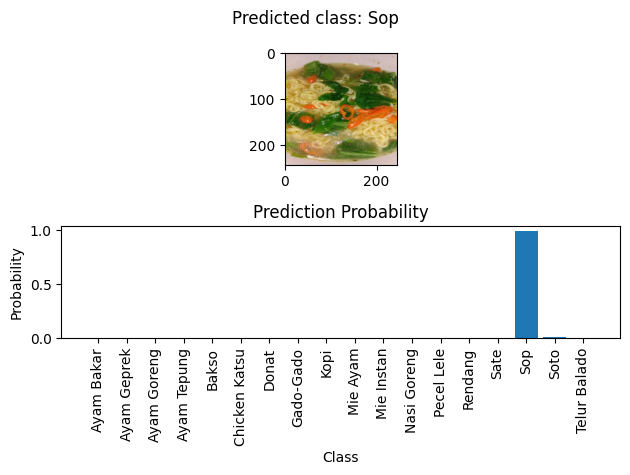

   Nama_makanan  Kalori  Lemak Karbohidrat Protein Kategori
15          Sop      72  1.93g      11.98g   2.12g    Sayur
1/1 [==============================] - 0s 30ms/step


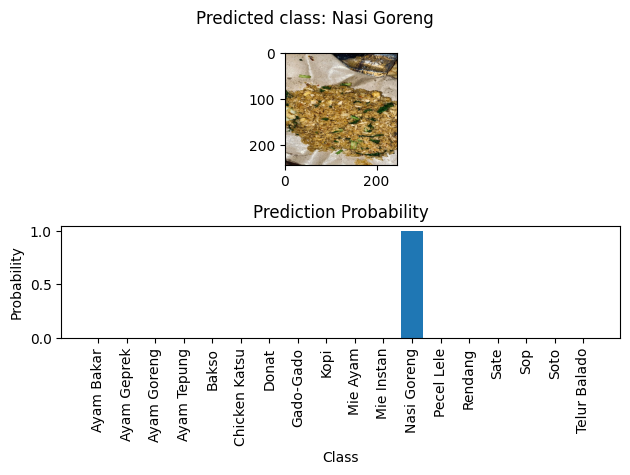

   Nama_makanan  Kalori  Lemak Karbohidrat Protein  Kategori
11  Nasi Goreng     250  9.28g      31.38g   9.39g  Serealia
1/1 [==============================] - 0s 31ms/step


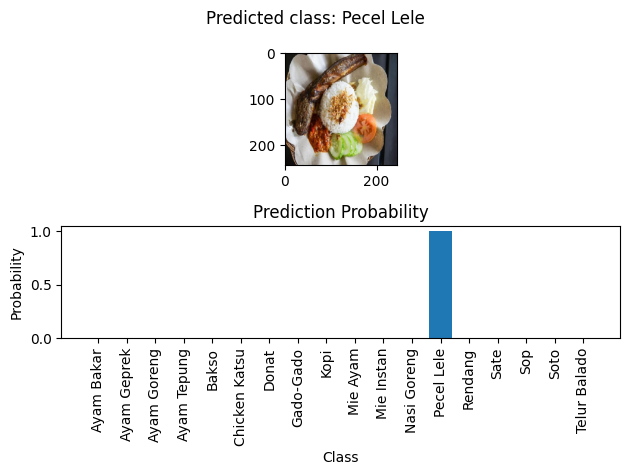

   Nama_makanan  Kalori   Lemak Karbohidrat Protein Kategori
12   Pecel Lele     292  17.22g       11.9g  23.06g     Ikan
1/1 [==============================] - 0s 20ms/step


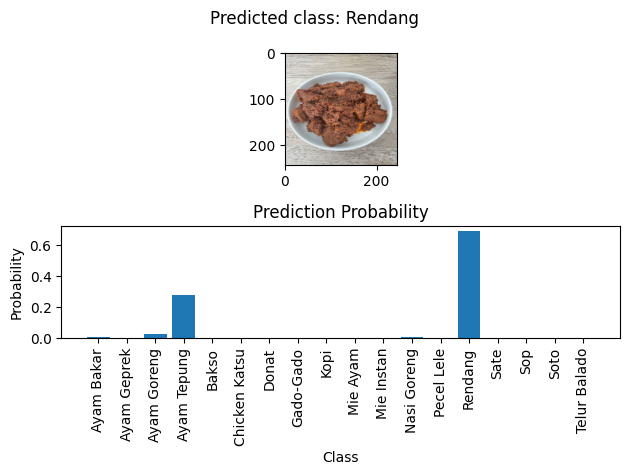

   Nama_makanan  Kalori   Lemak Karbohidrat Protein Kategori
13      Rendang     468  26.57g      10.78g  47.23g   Daging
1/1 [==============================] - 0s 27ms/step


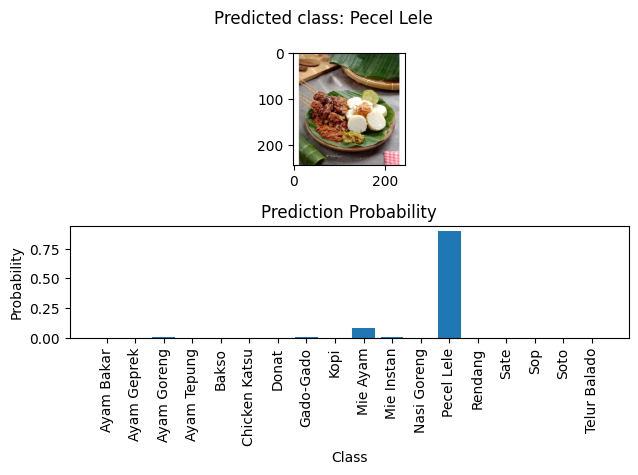

   Nama_makanan  Kalori   Lemak Karbohidrat Protein Kategori
12   Pecel Lele     292  17.22g       11.9g  23.06g     Ikan
1/1 [==============================] - 0s 18ms/step


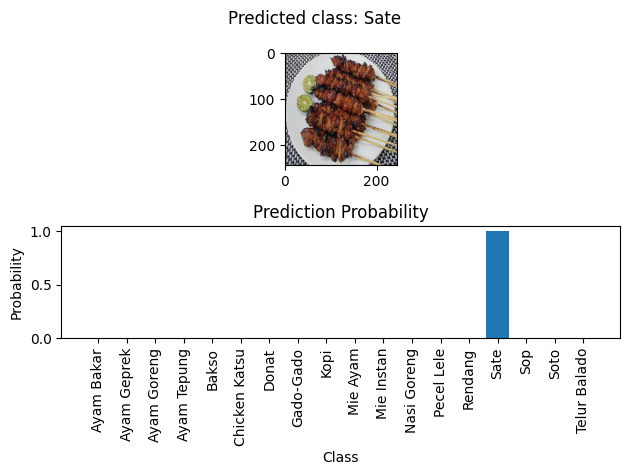

   Nama_makanan  Kalori  Lemak Karbohidrat Protein      Kategori
14         Sate     101  6.67g       2.19g   8.79g  Daging, Ayam
1/1 [==============================] - 0s 17ms/step


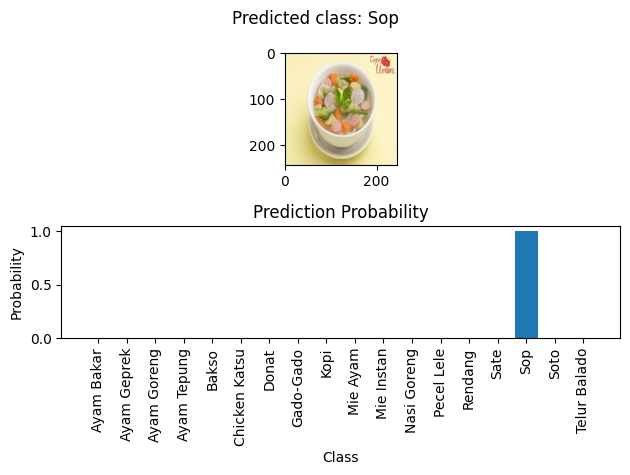

   Nama_makanan  Kalori  Lemak Karbohidrat Protein Kategori
15          Sop      72  1.93g      11.98g   2.12g    Sayur
1/1 [==============================] - 0s 20ms/step


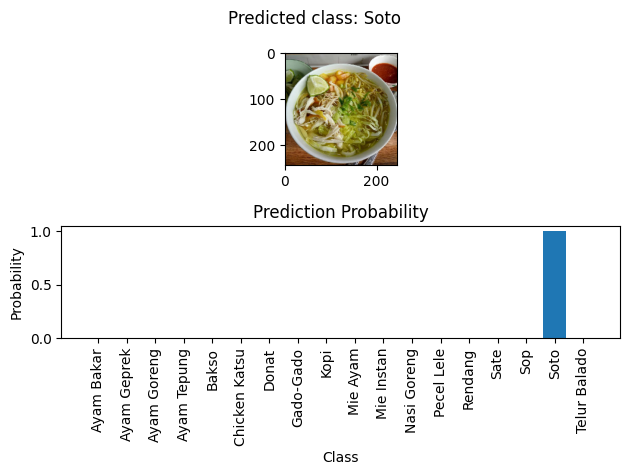

   Nama_makanan  Kalori   Lemak Karbohidrat Protein Kategori
16         Soto     312  14.92g      19.55g  24.01g    Sayur
1/1 [==============================] - 0s 22ms/step


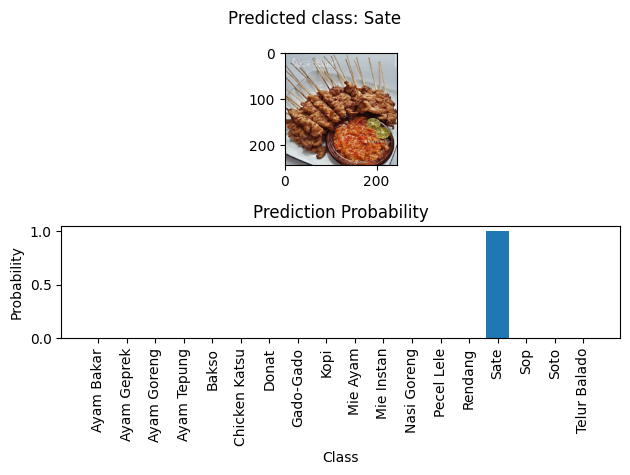

   Nama_makanan  Kalori  Lemak Karbohidrat Protein      Kategori
14         Sate     101  6.67g       2.19g   8.79g  Daging, Ayam


In [23]:
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_makanan = pd.read_csv('nutrisi.csv')

class_labels = ["Ayam Bakar", "Ayam Geprek", "Ayam Goreng", "Ayam Tepung", "Bakso", "Chicken Katsu", "Donat" , "Gado-Gado",
                 "Kopi", "Mie Ayam", "Mie Instan", "Nasi Goreng", "Pecel Lele", "Rendang", "Sate", "Sop", "Soto", "Telur Balado"]
#class_labels = (test_generator.class_indices)

# Path to the directory containing your test images
test_dir = os.path.join('Image Eye','Dev') 

# Get a list of all image files in the test directory
image_paths = [os.path.join(test_dir, file) for file in os.listdir(test_dir) if file.endswith(('.jpg', '.png', '.jpeg'))]

# image_paths = ["./Image Eye/Train/egg ballado/telurBalado Train (10).jpeg"]

for image_path in image_paths:
    # Load and preprocess the image using Pillow (PIL)
    img = load_img(image_path, target_size=(244, 244))  # Load and resize the image
    x = img_to_array(img)  # Convert the image to a NumPy array
    x = x / 255.0  # Normalize the pixel values to the range [0, 1]

    # Predict using the model
    yhat = model.predict(np.expand_dims(x, axis=0))
    predicted_class = np.argmax(yhat, axis=1)[0]
    predicted_label = class_labels[predicted_class]

    fig, ax = plt.subplots(nrows=2, ncols=1)  # Membuat subplots dengan 2 baris dan 1 kolom
    fig.suptitle(f'Class: {image_path}')
    fig.suptitle(f'Predicted class: {predicted_label}')
    
    # Menampilkan gambar di subplot pertama
    ax[0].imshow(x)  
    # Menampilkan kelas prediksi di subplot kedua
    ax[1].bar(class_labels, yhat.flatten())
    ax[1].set_title('Prediction Probability')
    ax[1].set_xlabel('Class')
    ax[1].set_ylabel('Probability')

    ax[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

    #predicted_class_index = np.argmax(yhat)

    if predicted_class < len(class_labels):
        predicted_class = class_labels[predicted_class]

        # Mengambil ID makanan dari nama kelas
        food_name = predicted_class

        # Menampilkan data nutrisi makanan
        nutrition_data = data_makanan[data_makanan['Nama_makanan'] == food_name]
        print(nutrition_data)
    else:
        print("Error: Predicted class index is out of range.")
    #print(f'Class index: {predicted_class}')

    #plt.imshow(x)  # Display the resized image
    #plt.title(f'Predicted class: {predicted_label}')
    #plt.show()

In [ ]:
train_generator.class_indices

{'Ayam Bakar': 0,
 'Ayam Geprek': 1,
 'Ayam Goreng': 2,
 'Ayam Tepung': 3,
 'Bakso': 4,
 'Chicken Katsu': 5,
 'Donat': 6,
 'Gado-Gado': 7,
 'Kopi': 8,
 'Mie Ayam': 9,
 'Mie Instan': 10,
 'Nasi Goreng': 11,
 'Pecel Lele': 12,
 'Rendang': 13,
 'Sate': 14,
 'Sop': 15,
 'Soto': 16,
 'Telur Balado': 17}

In [ ]:
test_generator.class_indices

{'Ayam Bakar': 0,
 'Ayam Geprek': 1,
 'Ayam Goreng': 2,
 'Ayam Tepung': 3,
 'Bakso': 4,
 'Chicken Katsu': 5,
 'Donat': 6,
 'Gado-Gado': 7,
 'Kopi': 8,
 'Mie Ayam': 9,
 'Mie Instan': 10,
 'Nasi Goreng': 11,
 'Pecel Lele': 12,
 'Rendang': 13,
 'Sate': 14,
 'Sop': 15,
 'Soto': 16,
 'Telur Balado': 17}

In [ ]:
print(data_makanan['Nama_makanan'])

0     Ayam Bakar,201,"11,46g",0g,"23,01g","Daging, A...
1     Ayam Geprek,789,"53,97g","22,81g","52,82g","Da...
2         Ayam Goreng,230,12.4g,6g,23.5g,"Daging, Ayam"
3     Ayam Tepung,291,18.82g,"16,32g",15.59g,"Daging...
4           Bakso,225,"7,87g","9,71g","27,15g",Serealia
5     Chicken Katsu,297,"18,82g","16,32g","15,59g","...
6             Donat,426,"22,9g","50,8g","5,2g",Serealia
7        Gado-gado,318,"17,86g","26,28g","17,22g",Sayur
8               Kopi,29,"0,01g","7,12g","0,19g",Minuman
9     Mie Ayam,421,"18,74g","46,21g","16,7g","Sereal...
10                                           Mie Instan
11                                          Nasi Goreng
12                                           Pecel Lele
13        Rendang,468,"26,57g","10,78g","47,23g",Daging
14      Sate,101,"6,67g","2,19g","8,79g","Daging, Ayam"
15                Sop,72,"1,93g","11,98g","2,12g",Sayur
16            Soto,312,"14,92g","19,55g","24,01g",Sayur
17                                         Telur

https://www.kaggle.com/code/mehrdadsadeghi/fashionmnist-cnn-with-tensorflow-confusionmatrix

# Model Saved

In [ ]:
# Save the model
from tensorflow.keras.models import load_model
model.save('foodnutrition.h5')

In [ ]:
import pickle
pickle.dump(model,open('foodnutrition.pkl','wb'))

finished!! :D